# Regression example

Abstract: Concrete is the most important material in civil engineering. The 
concrete compressive strength is a highly nonlinear function of age and 
ingredients. These ingredients include cement, blast furnace slag, fly ash, 
water, superplasticizer, coarse aggregate, and fine aggregate.


Variable Information:

Given is the variable name, variable type, the measurement unit and a brief description. 
The concrete compressive strength is the regression problem. The order of this listing 
corresponds to the order of numerals along the rows of the database. 

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable 

## Import Data

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls')

In [3]:
dataset.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## Clean Data

In [4]:
# The data is already clean!

## Explore Data

In [5]:
import matplotlib.pyplot as plt

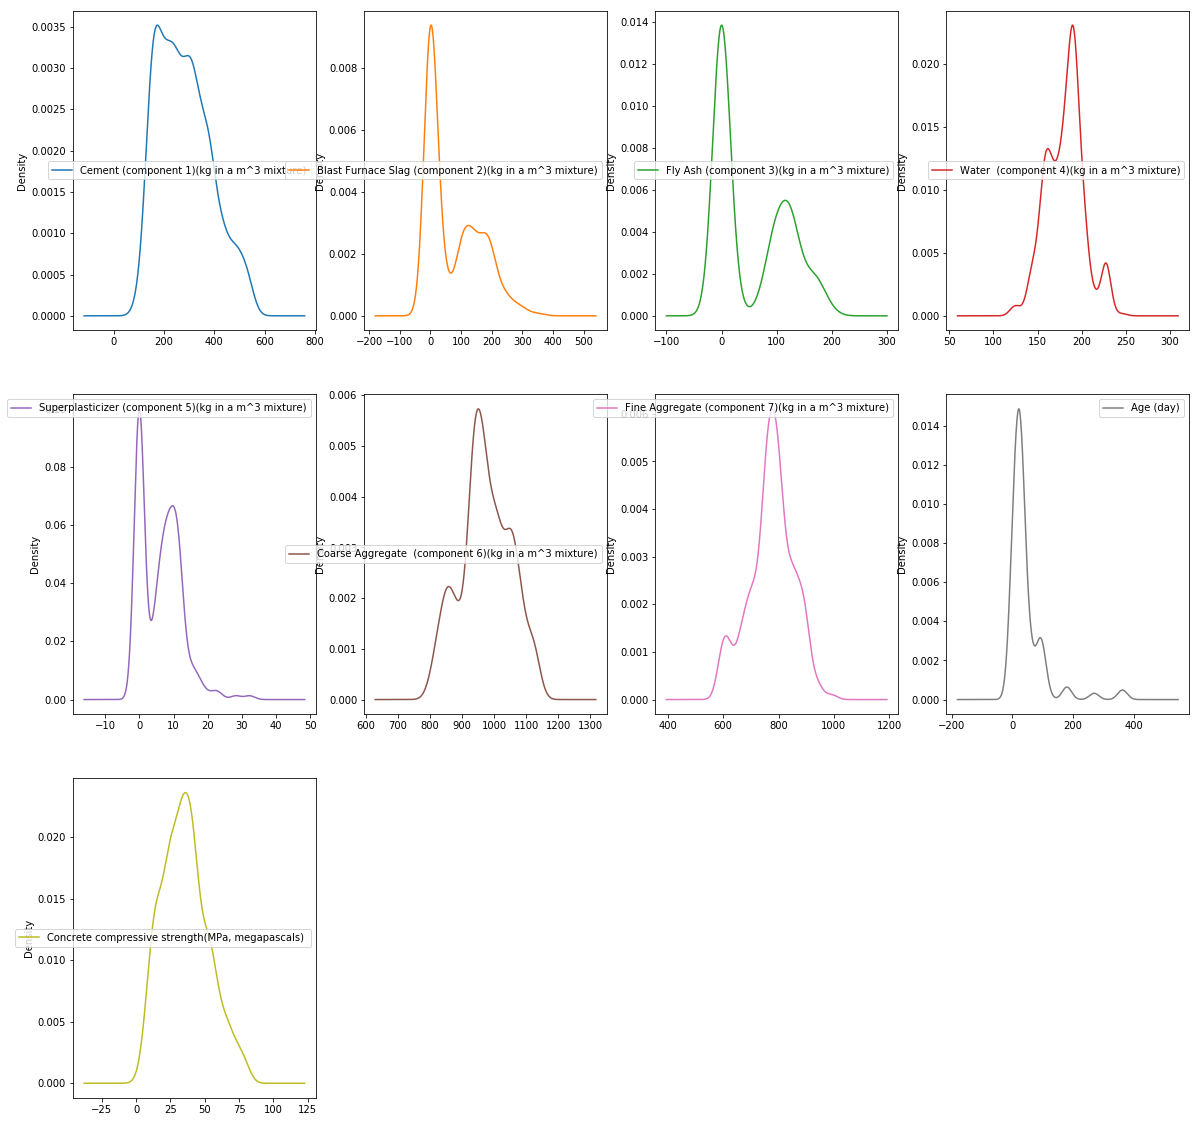

In [6]:
# each variable
dataset.plot(kind='density', subplots=True, layout=(3,4), sharex=False, sharey=False,figsize=(20,20))
plt.show()

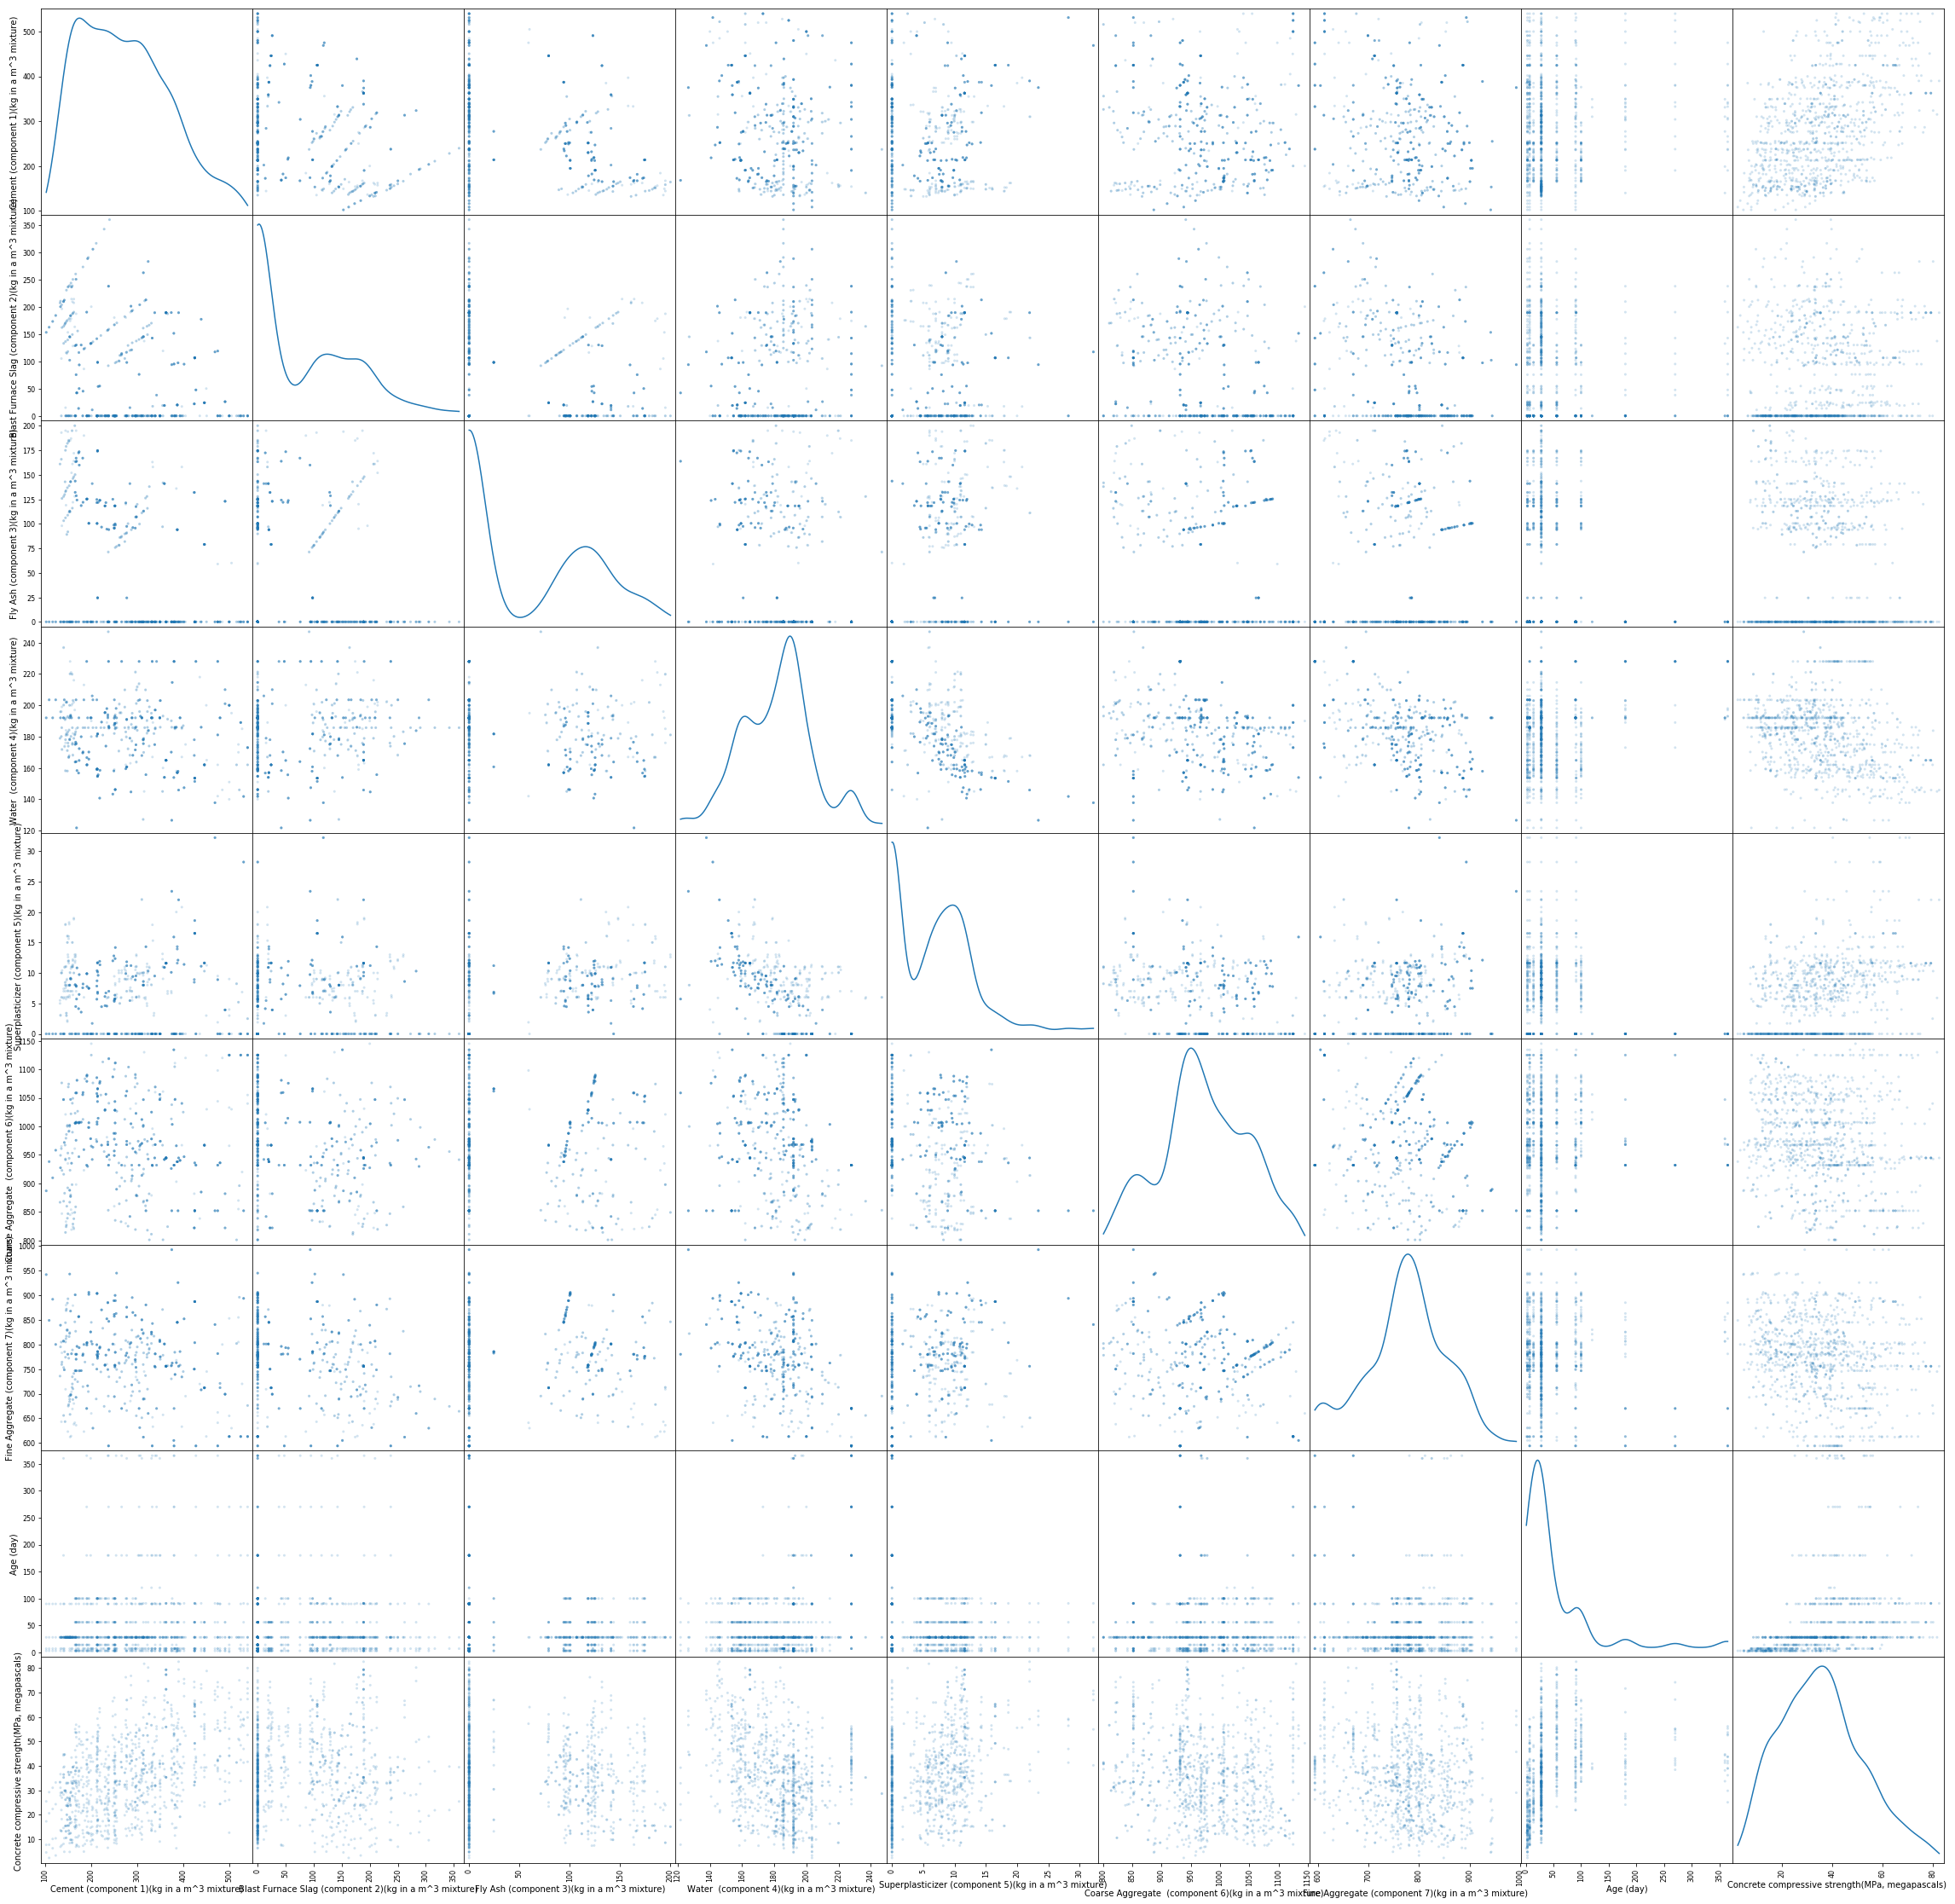

In [7]:
# correlations?
pd.plotting.scatter_matrix(dataset,alpha=0.2, figsize=(40, 40), diagonal='kde')
plt.show()

## Split Data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X=dataset.drop('Concrete compressive strength(MPa, megapascals) ',axis=1)
y=dataset['Concrete compressive strength(MPa, megapascals) ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Model training

In [10]:
from sklearn import linear_model

In [11]:
model = linear_model.LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Test and Evaluate

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Make predictions using the testing set
y_predictions = model.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predictions))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_predictions))

Mean squared error: 95.98
Variance score: 0.63


## Show results

In [14]:
# The coefficients
print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Coefficients: 
 [ 0.11897516  0.10851781  0.08216854 -0.13571192  0.30873202  0.01780436
  0.02406104  0.11644448]
Intercept: 
 -28.6357393566


## Exercise

1. How would you implement crossvalidation? search and try!
2. Can you use another model for this regression? try another one.